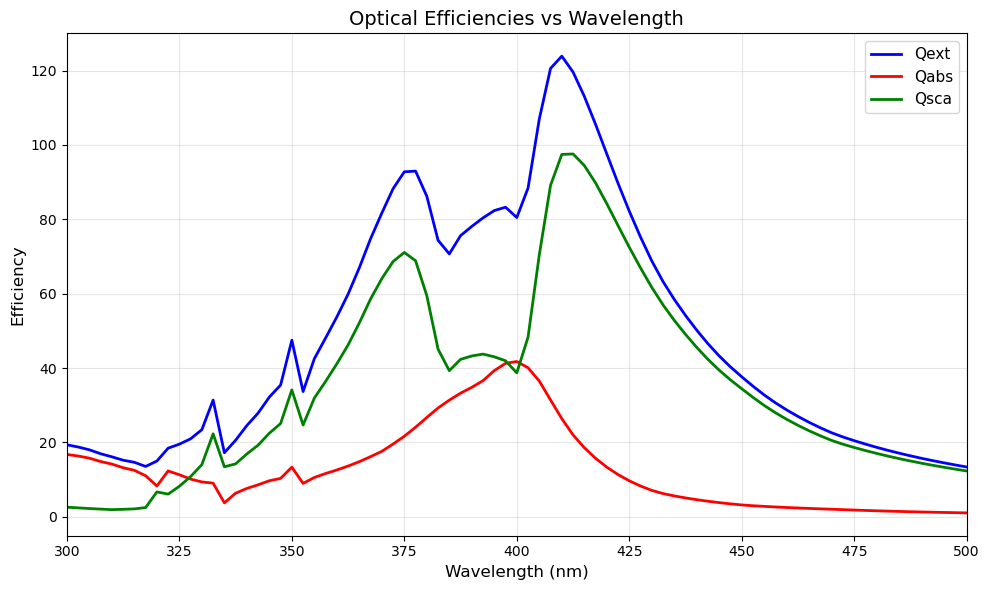

Wavelength range: 300.0 - 500.0 nm
Max Qext: 123.864 at 410.0 nm
Max Qabs: 41.765 at 400.0 nm
Max Qsca: 97.569 at 412.5 nm


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data from your ADDA simulation
data = """300.0 19.37753351 16.77701176 
302.5 18.78734319 16.36332806 
305.0 18.02916788 15.78680007 
307.5 16.96770968 14.87932961 
310.0 16.14344888 14.19721649 
312.5 15.23583315 13.20511628 
315.0 14.66515988 12.51601553 
317.5 13.5598122 11.05718779 
320.0 15.01078661 8.298128871 
322.5 18.47085106 12.35122323 
325.0 19.54962116 11.32143509 
327.5 20.99302641 10.15564671 
330.0 23.4497499 9.393792835 
332.5 31.39686645 9.070958811 
335.0 17.24293342 3.77514043 
337.5 20.60833993 6.36543211 
340.0 24.56026538 7.6443967 
342.5 27.90778098 8.621655639 
345.0 32.21275289 9.714099873 
347.5 35.43925502 10.34101462 
350.0 47.49786939 13.36208522 
352.5 33.69091968 8.993318679 
355.0 42.53014746 10.59393128 
357.5 48.07964623 11.65830365 
360.0 53.76022367 12.60773742 
362.5 59.88620376 13.66484661 
365.0 66.9939568 14.84361882 
367.5 74.78293858 16.19953559 
370.0 81.68174354 17.62077512 
372.5 88.23015503 19.58010279 
375.0 92.77312478 21.67640331 
377.5 92.96411804 24.10094406 
380.0 86.19840233 26.72619955 
382.5 74.37211555 29.27864946 
385.0 70.70006261 31.38612646 
387.5 75.61077612 33.26524795 
390.0 78.09943778 34.83518041 
392.5 80.39114365 36.62801073 
395.0 82.3561414 39.32668269 
397.5 83.25147363 41.28227012 
400.0 80.48336039 41.76496495 
402.5 88.40730383 40.09118003 
405.0 106.9523087 36.51384955 
407.5 120.5728967 31.4355991 
410.0 123.8640668 26.41922098 
412.5 119.6052322 22.03622791 
415.0 113.0883625 18.61318309 
417.5 105.5583282 15.75716937 
420.0 97.59645837 13.37359006 
422.5 89.69645515 11.37161079 
425.0 82.19867032 9.69608 
427.5 75.23629446 8.300860041 
430.0 68.82783546 7.121765005 
432.5 63.27217358 6.267151425 
435.0 58.47835749 5.634137247 
437.5 54.1612034 5.096764294 
440.0 50.18822662 4.626474503 
442.5 46.54184902 4.20494422 
445.0 43.25690395 3.829338861 
447.5 40.31843938 3.499999739 
450.0 37.66018975 3.21136807 
452.5 35.13116403 2.994605486 
455.0 32.7753718 2.822033305 
457.5 30.65607719 2.664300745 
460.0 28.74419188 2.521277906 
462.5 27.00106239 2.391064681 
465.0 25.40210621 2.270978617 
467.5 23.93896506 2.159466509 
470.0 22.60433921 2.056192095 
472.5 21.47620644 1.945493125 
475.0 20.48716422 1.833830679 
477.5 19.56112577 1.730724009 
480.0 18.6933132 1.635164419 
482.5 17.88081845 1.54643268 
485.0 17.12037848 1.464007913 
487.5 16.40764813 1.387415029 
490.0 15.73810237 1.316146624 
492.5 15.10828422 1.249690706 
495.0 14.5161201 1.187600445 
497.5 13.9501985 1.12850247 
500.0 13.41339613 1.072679023"""

3
# Parse the data
lines = data.strip().split('\n')
wavelength = []
qext = []
qabs = []

for line in lines:
    parts = line.split()
    wavelength.append(float(parts[0]))
    qext.append(float(parts[1]))
    qabs.append(float(parts[2]))

# Convert to numpy arrays
wavelength = np.array(wavelength)
qext = np.array(qext)
qabs = np.array(qabs)

# Calculate Qsca from the relationship: Qext = Qabs + Qsca
qsca = qext - qabs

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(wavelength, qext, 'b-', linewidth=2, label='Qext')
plt.plot(wavelength, qabs, 'r-', linewidth=2, label='Qabs')
plt.plot(wavelength, qsca, 'g-', linewidth=2, label='Qsca')

plt.xlabel('Wavelength (nm)', fontsize=12)
plt.ylabel('Efficiency', fontsize=12)
plt.title('Optical Efficiencies vs Wavelength', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(300, 500)

# Add some styling
plt.tight_layout()

# Show the plot
plt.show()

# Print some statistics
print(f"Wavelength range: {wavelength.min():.1f} - {wavelength.max():.1f} nm")
print(f"Max Qext: {qext.max():.3f} at {wavelength[np.argmax(qext)]:.1f} nm")
print(f"Max Qabs: {qabs.max():.3f} at {wavelength[np.argmax(qabs)]:.1f} nm")
print(f"Max Qsca: {qsca.max():.3f} at {wavelength[np.argmax(qsca)]:.1f} nm")

In [2]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Complete Johnson & Christy 1972 silver data from RefractiveIndex.info
# Format: wavelength(μm), n, k
jc_data = np.array([
    [0.1879, 1.07, 1.212],
    [0.1916, 1.10, 1.232],
    [0.1953, 1.12, 1.255],
    [0.1993, 1.14, 1.277],
    [0.2033, 1.15, 1.296],
    [0.2073, 1.18, 1.312],
    [0.2119, 1.20, 1.325],
    [0.2164, 1.22, 1.336],
    [0.2214, 1.25, 1.342],
    [0.2262, 1.26, 1.344],
    [0.2313, 1.28, 1.357],
    [0.2371, 1.28, 1.367],
    [0.2426, 1.30, 1.378],
    [0.2490, 1.31, 1.389],
    [0.2551, 1.33, 1.393],
    [0.2616, 1.35, 1.387],
    [0.2689, 1.38, 1.372],
    [0.2761, 1.41, 1.331],
    [0.2844, 1.41, 1.264],
    [0.2924, 1.39, 1.161],
    [0.3009, 1.34, 0.964],
    [0.3107, 1.13, 0.616],
    [0.3204, 0.81, 0.392],
    [0.3315, 0.17, 0.829],
    [0.3425, 0.14, 1.142],
    [0.3542, 0.10, 1.419],
    [0.3679, 0.07, 1.657],
    [0.3815, 0.05, 1.864],
    [0.3974, 0.05, 2.070],
    [0.4133, 0.05, 2.275],
    [0.4305, 0.04, 2.462],
    [0.4509, 0.04, 2.657],
    [0.4714, 0.05, 2.869],
    [0.4959, 0.05, 3.093],
    [0.5209, 0.05, 3.324]
])

# Convert wavelength from μm to nm
wavelengths_nm = jc_data[:, 0] * 1000
n_values = jc_data[:, 1]
k_values = jc_data[:, 2]

# Create interpolation functions
n_interp = interp1d(wavelengths_nm, n_values, kind='cubic', bounds_error=False, fill_value='extrapolate')
k_interp = interp1d(wavelengths_nm, k_values, kind='cubic', bounds_error=False, fill_value='extrapolate')

# Test at your specific wavelengths
test_wavelengths = [300, 350, 400, 450, 500]
print("Interpolated values from complete J&C data:")
for wl in test_wavelengths:
    n = n_interp(wl)
    k = k_interp(wl)
    print(f"{wl}nm: n = {n:.6f}, k = {k:.6f}")

# Compare to the individual points you looked up earlier
print("\nComparison to individual lookups:")
individual_data = [
    [300, 1.3453, 0.98486],
    [350, 0.11436, 1.3196],
    [400, 0.050000, 2.1035],
    [450, 0.040000, 2.6484],
    [500, 0.050000, 3.1309]
]

for wl, n_ref, k_ref in individual_data:
    n_interp_val = n_interp(wl)
    k_interp_val = k_interp(wl)
    print(f"{wl}nm: Reference n={n_ref:.6f}, k={k_ref:.6f}")
    print(f"      Interpolated n={n_interp_val:.6f}, k={k_interp_val:.6f}")
    print(f"      Difference: Δn={abs(n_ref-n_interp_val):.6f}, Δk={abs(k_ref-k_interp_val):.6f}")
    print()

Interpolated values from complete J&C data:
300nm: n = 1.350942, k = 0.990109
350nm: n = 0.126328, k = 1.322939
400nm: n = 0.050758, k = 2.103616
450nm: n = 0.039656, k = 2.648067
500nm: n = 0.049337, k = 3.128912

Comparison to individual lookups:
300nm: Reference n=1.345300, k=0.984860
      Interpolated n=1.350942, k=0.990109
      Difference: Δn=0.005642, Δk=0.005249

350nm: Reference n=0.114360, k=1.319600
      Interpolated n=0.126328, k=1.322939
      Difference: Δn=0.011968, Δk=0.003339

400nm: Reference n=0.050000, k=2.103500
      Interpolated n=0.050758, k=2.103616
      Difference: Δn=0.000758, Δk=0.000116

450nm: Reference n=0.040000, k=2.648400
      Interpolated n=0.039656, k=2.648067
      Difference: Δn=0.000344, Δk=0.000333

500nm: Reference n=0.050000, k=3.130900
      Interpolated n=0.049337, k=3.128912
      Difference: Δn=0.000663, Δk=0.001988



In [3]:
import numpy as np

# Your original wavelength range
wavelengths = np.arange(300, 502.5, 2.5)

print("# Correct Johnson & Christy 1972 Silver data for ADDA")
print("# Wavelength(nm)  n_real    n_imag(k)")

for wl in wavelengths:
    n = n_interp(wl)
    k = k_interp(wl)
    print(f"{wl:6.1f}        {n:8.6f}  {k:8.6f}")

# Correct Johnson & Christy 1972 Silver data for ADDA
# Wavelength(nm)  n_real    n_imag(k)
 300.0        1.350942  0.990109
 302.5        1.315427  0.914372
 305.0        1.266302  0.829763
 307.5        1.208527  0.738584
 310.0        1.147146  0.643162
 312.5        1.086215  0.546717
 315.0        1.020298  0.461093
 317.5        0.938656  0.402953
 320.0        0.830490  0.389012
 322.5        0.688283  0.432337
 325.0        0.525888  0.522241
 327.5        0.365707  0.638529
 330.0        0.230167  0.760981
 332.5        0.141268  0.869666
 335.0        0.104450  0.955868
 337.5        0.103640  1.025440
 340.0        0.121327  1.085208
 342.5        0.140000  1.142000
 345.0        0.145834  1.201166
 347.5        0.139743  1.262155
 350.0        0.126328  1.322939
 352.5        0.110186  1.381493
 355.0        0.095887  1.435805
 357.5        0.085937  1.484993
 360.0        0.079525  1.529990
 362.5        0.075544  1.571889
 365.0        0.072887  1.611785
 367.5        0.0